In [1]:
from keras.datasets import reuters 
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

Using TensorFlow backend.


In [2]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
X_train=vectorize_sequences(train_data)
X_test=vectorize_sequences(test_data)

In [3]:
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

In [4]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
X_val = X_train[:1000] 
partial_X_train = X_train[1000:] 

Y_val = one_hot_train_labels[:1000]
partial_Y_train = one_hot_train_labels[1000:] 

In [7]:
history = model.fit(partial_X_train,                     
                    partial_Y_train,                     
                    epochs=9,                     
                    batch_size=512,
                    validation_data=(X_val, Y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 214us/step - loss: 2.6818 - accuracy: 0.5276 - val_loss: 1.7829 - val_accuracy: 0.6390
Epoch 2/9
7982/7982 [==============================] - 1s 159us/step - loss: 1.4348 - accuracy: 0.7101 - val_loss: 1.2995 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 159us/step - loss: 1.0451 - accuracy: 0.7853 - val_loss: 1.1511 - val_accuracy: 0.7600
Epoch 4/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.8275 - accuracy: 0.8272 - val_loss: 1.0485 - val_accuracy: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.6620 - accuracy: 0.8613 - val_loss: 0.9923 - val_accuracy: 0.7870
Epoch 6/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.5315 - accuracy: 0.8898 - val_loss: 0.9518 - val_accuracy: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.430

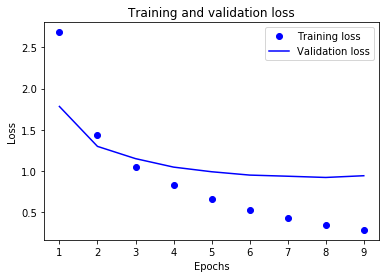

In [8]:
import matplotlib.pyplot as plt 
 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
 
epochs = range(1, len(loss) + 1) 
 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
 
plt.show()

In [9]:
results = model.evaluate(X_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 217us/step
[1.015566471529559, 0.7813891172409058]
